## Building Linear Regression model from scratch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We will export a simple dataset with only one feature and one dependant feature.

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Plotting our data points.

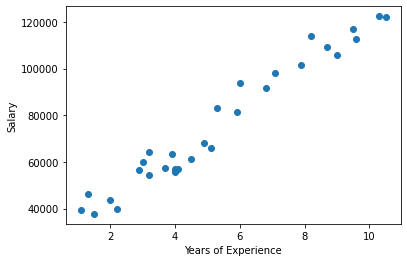

In [4]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [5]:
import numpy as np

Here we have many possible slopes and intercepts that can fit the data points. Our model should get the best-fit line that fits the data.

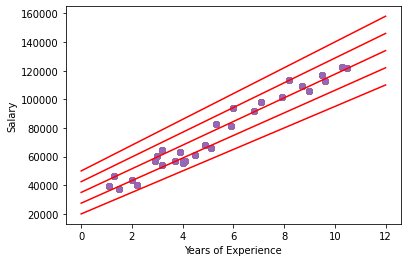

In [6]:
x_line = np.linspace(0,12,100)
slopes=np.linspace(7500,9000,5)
intercept=np.linspace(20000,50000,5)
j=0
for i in slopes:
    y_line= i*x_line+intercept[j]
    plt.scatter(df['YearsExperience'],df['Salary'])
    plt.plot(x_line,y_line,'-r')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    j=j+1
plt.show()

We will calculate the sum of square residuals of each slope and get the global minima point which represents the best-fit line parameters.

We should do optimization for the intercept value also to find the best-fit line intercept parameter, but this should be represented in 3-D graph. For simplicity, we plot the sum of square residuals with intercept equal to 3500. 

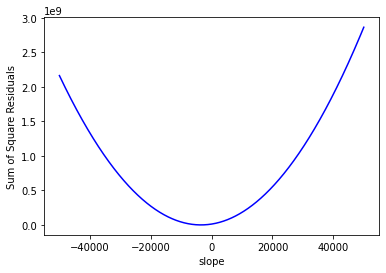

In [7]:
x_ss = np.linspace(-50000,50000,1000)
y_ss= (x_ss+3500)**2
plt.plot(x_ss,y_ss,'-b')
plt.xlabel('slope')
plt.ylabel('Sum of Square Residuals')
plt.show()

Here we will create 100 possible line with different 100 slopes and intercepts. Then we will calculate the square residual and get the global minima.

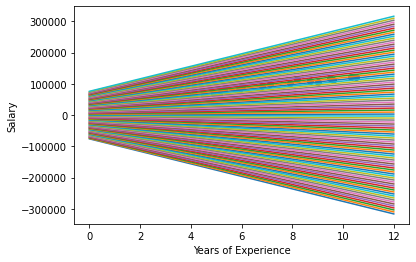

In [8]:
slopes=np.linspace(-20000,20000,100)
x_line=np.linspace(0,12,100)
intercept=np.linspace(-1*(df['Salary'].mean()),df['Salary'].mean(),100)
ss_residuals=[]
for i,slope in enumerate (slopes):
    y_line=slope*x_line+intercept[i]
    residuals=0
    for j,salary in enumerate (df['Salary']):
        error=(salary-(slope*df['YearsExperience'][j]+intercept[i]))**2
        residuals=residuals+error
    ss_residuals.append(residuals)
    plt.plot(x_line,y_line)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

Plotting the sum of square residuals versus the different values of slope.

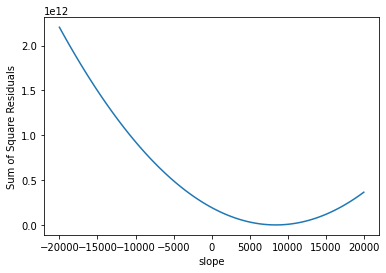

In [9]:
plt.plot(slopes,ss_residuals,'-')
plt.xlabel('slope')
plt.ylabel('Sum of Square Residuals')
plt.show()

Using argmax function we can get the index of the minimum value in SSR list. 

In [16]:
min_SSR=np.argmin(ss_residuals)
min_SSR

70

In [18]:
slopes[70]

8282.828282828283

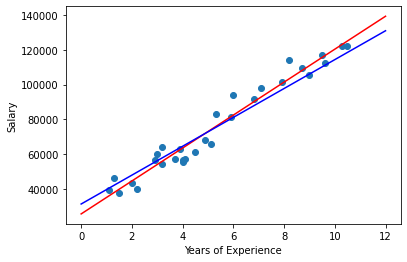

In [19]:
slopes=np.linspace(-20000,20000,100)
x_line=np.linspace(0,12,100)
intercept=np.linspace(-1*(df['Salary'].mean()),df['Salary'].mean(),100)
y_line1=slopes[70]*x_line+intercept[70]
y_line=9449.96232146*x_line+25792.20019866871
plt.plot(x_line,y_line,'-r')
plt.plot(x_line,y_line1,'-b')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

The intercept that is corsponding to the minimum error is at index 70 as we assumed that the slope of the line is changed with equal steps as the intecept. In practice, we should apply SSR calculation to the intercept and get the minimum value as we did for the slope.

In [20]:
intercept[70]

31475.989898989894

#### The parameters of the best-fit line are slope(a) = 8282.828282828283, and intercept(b) = 31475.989898989894

### Applying Linear Regression model of SKlearn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression(fit_intercept=True)

In [23]:
X=(np.array(df['YearsExperience'])).reshape(-1,1)
lm.fit(X, df['Salary'])

LinearRegression()

In [24]:
lm.coef_

array([9449.96232146])

In [25]:
lm.intercept_

25792.20019866871

In [26]:
lm.score(X,df['Salary'])

0.9569566641435086

#### From linear regression model we got the following parameters, slope(a) = 9449.9623 and intercept(b) = 25792.2001

The R square value of our model is 0.95 which is perfect. Comparing the values from sklearn model and our model, we find that they are very close and the values can be increased with more steps in our parameters.

Now let's find R_square value for our best-file line. the equaltion of R_square = 1-(SS_residuals/SS_total).

SS_residual is the sum of squared residuals of our line. And SS_total is the residuals between the mean line of y-axis and datapoints.

In [54]:
for y in df.Salary:
    SS = (y-df.Salary.mean())**2
    SS_total = SS_total + SS


In [57]:
1- (ss_residuals[70]/SS_total)

0.9470974970585084

#### R_square value of our best-fit line is very close to the value of the linear regrission model.